In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.datasets import mnist, fashion_mnist, cifar10
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

In [ ]:
def show_model(model):
    if not COLAB:
        display(SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg')))
    else:
        display(SVG(model_to_dot(model, show_shapes=True, dpi=72).create(prog='dot', format='svg')))

In [ ]:
(X_tr, y_tr), (X_te, y_te) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_tr.shape, X_te.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
np.unique(y_tr), np.unique(y_te)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

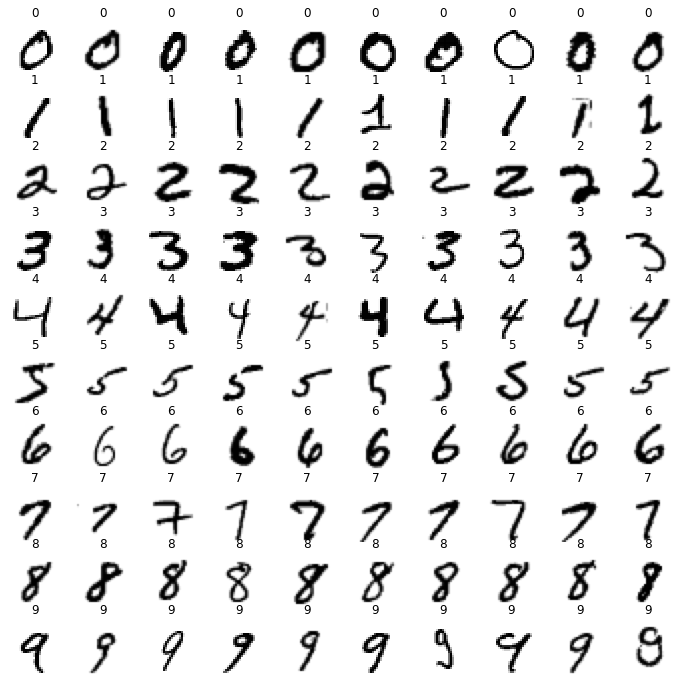

In [ ]:
plt.figure(figsize=(12,12))
cont = 1
for clase in range(10):
  inds = np.where(y_tr==clase)[0]
  for ind in inds[:10]:
    plt.subplot(10,10,cont)
    plt.imshow(X_tr[ind], cmap="binary") 
    plt.axis("off")
    plt.title(str(y_tr[ind]))
    cont = cont + 1

In [ ]:
X_tr2 = X_tr[(y_tr == 0)] # clase 0 es la clase ok
X_te2 = np.vstack((X_te[(y_te == 0)], X_te[(y_te == 1)][:10]))
y_te2 = np.array(sum(y_te==0)*[0] + 10*[1])

In [ ]:
len(X_tr2), len(X_te2)

(5923, 990)

In [ ]:
from sklearn.model_selection import train_test_split
X_tr2, X_val2 = train_test_split(X_tr2, test_size=0.3, random_state=1) # el 30% lo llevo a validación

In [ ]:
from tensorflow import keras

In [ ]:
X_tr2.shape

(4146, 28, 28)

In [ ]:
X_tr2.min(), X_tr2.max(), X_val2.min(), X_val2.max(), X_te2.min(), X_te2.max()

(0, 255, 0, 255, 0, 255)

In [ ]:
X_tr2 = X_tr2 / 255
X_val2 = X_val2 / 255
X_te2 = X_te2 / 255

In [ ]:
X_tr2.min(), X_tr2.max(), X_val2.min(), X_val2.max(), X_te2.min(), X_te2.max()

(0.0, 1.0, 0.0, 1.0, 0.0, 1.0)

In [ ]:
# defino mi red como una lista de capas:

model = keras.Sequential(
    [
     keras.Input((28,28)),
     keras.layers.Flatten(),
     keras.layers.Dense(50, activation="relu"),
     keras.layers.Dense(10, activation="relu"),
     keras.layers.Dense(50, activation="relu"),
     keras.layers.Dense(28*28, activation="sigmoid"),
     keras.layers.Reshape((28,28))
    ]
)

In [ ]:
model.compile(optimizer='rmsprop', loss="mse") # modelo de regresión

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 50)                550       
                                                                 
 dense_3 (Dense)             (None, 784)               39984     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 80,294
Trainable params: 80,294
Non-traina

In [ ]:
lista_callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="best_model.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]

In [ ]:
historia = model.fit(X_tr2, X_tr2, batch_size=128, epochs=200, callbacks=lista_callbacks,
                     validation_data=(X_val2, X_val2))

Epoch 1/200
33/33 [==============================] - 1s 16ms/step - loss: 0.2088 - val_loss: 0.1340
Epoch 2/200
33/33 [==============================] - 0s 9ms/step - loss: 0.0822 - val_loss: 0.0662
Epoch 3/200
33/33 [==============================] - 0s 9ms/step - loss: 0.0646 - val_loss: 0.0643
Epoch 4/200
33/33 [==============================] - 0s 9ms/step - loss: 0.0638 - val_loss: 0.0639
Epoch 5/200
33/33 [==============================] - 0s 9ms/step - loss: 0.0636 - val_loss: 0.0637
Epoch 6/200
33/33 [==============================] - 0s 10ms/step - loss: 0.0634 - val_loss: 0.0637
Epoch 7/200
33/33 [==============================] - 0s 9ms/step - loss: 0.0632 - val_loss: 0.0636
Epoch 8/200
33/33 [==============================] - 0s 10ms/step - loss: 0.0628 - val_loss: 0.0628
Epoch 9/200
33/33 [==============================] - 0s 9ms/step - loss: 0.0622 - val_loss: 0.0619
Epoch 10/200
33/33 [==============================] - 0s 9ms/step - loss: 0.0606 - val_loss: 0.0597
Epoch 

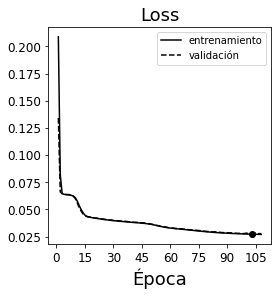

In [ ]:
from matplotlib.ticker import MaxNLocator

f = plt.figure(figsize=(4,4))
h = historia.history
aux = range(1,len(h["loss"])+1)
mejor_epoca = np.argmin(h["val_loss"]) + 1
plt.plot(aux, h["loss"], "k", label="entrenamiento")
plt.plot(aux, h["val_loss"], "--k", label="validación")
plt.plot(mejor_epoca, h["val_loss"][mejor_epoca], 'ok')
plt.title('Loss', fontsize=18)
plt.xlabel('Época', fontsize=18)
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.legend()
f.gca().xaxis.set_major_locator(MaxNLocator(integer=True));

In [ ]:
# cargo best_model de fichero, que es el punto rojo (donde mejor métrica en validación)
model = keras.models.load_model("best_model.keras")

In [ ]:
errores_signo = (X_te2 - model.predict(X_te2))
errores_cuad  = errores_signo**2
errores_cuad.shape

31/31 [==============================] - 0s 2ms/step


(990, 28, 28)

In [ ]:
error_por_imagen = (errores_cuad.sum(axis=1).sum(axis=1)/(28*28)) # ecm por píxel
error_por_imagen.shape

(990,)

In [ ]:
inds = np.argsort(error_por_imagen)[::-1] # saco los índices de los errores de mayor a menor magnitud

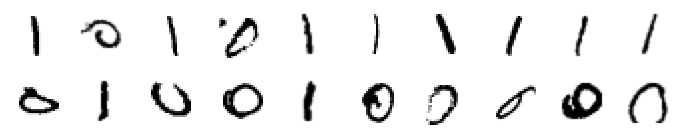

In [ ]:
# 20 imágenes más anómalas en test:

plt.figure(figsize=(12,12)) 
cont = 1 
for ind in inds[:20]: 
  plt.subplot(10,10,cont) 
  plt.imshow(X_te2[ind], cmap="binary") 
  plt.axis("off") 
  cont = cont + 1

In [ ]:
def show_error(error):
    img = np.zeros((error.shape[0],error.shape[1],3))
    img[:,:,1] = np.clip(error, 0, 1)
    img[:,:,2] = np.clip(error, 0, 1)

    img[:,:,0] = -np.clip(error, -1, 0)
    img[:,:,1] = img[:,:,1] - np.clip(error, -1, 0)
    
    plt.imshow(1-img**2, vmin=0, vmax=1)
    plt.axis("off")

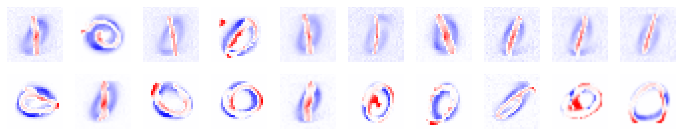

In [ ]:
# Rojo: "píxeles de más" (el valor del píxel es más alto del esperado)
# Azul: "píxeles de menos" (el valor del píxel es más bajo de lo esperado)
plt.figure(figsize=(12,12)) 
cont = 1 
for ind in inds[:20]: 
  plt.subplot(10,10,cont) 
  show_error(errores_signo[ind])
  cont = cont + 1

## Autoencoder con PCA (benchmark)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)

In [ ]:
X_tr2_flatten = X_tr2.reshape(len(X_tr2), -1)
X_tr2_flatten.shape

(4146, 784)

In [ ]:
pca.fit(X_tr2_flatten)

PCA(n_components=10)

In [ ]:
X_te2_flatten = X_te2.reshape(len(X_te2), -1)
X_te2_flatten.shape

(990, 784)

In [ ]:
pca.transform(X_te2_flatten) # "encoder"

array([[-1.95285279, -1.78143693, -2.87953939, ..., -0.55943354,
        -0.42303306,  0.2943916 ],
       [ 3.28243356, -0.43111377, -0.50965732, ...,  0.73182699,
         1.05908005, -1.23300831],
       [ 1.07955749, -3.06311637, -1.70197292, ..., -0.59452613,
        -0.59158977,  1.68052366],
       ...,
       [-0.46827205, -3.17428813,  5.81877674, ..., -0.23200554,
        -0.38573665, -0.18259574],
       [-0.5810824 , -3.02211219,  4.32126538, ...,  0.06302616,
         0.81870036, -0.08426777],
       [-0.70464576, -2.99118371,  5.68047953, ..., -0.48722108,
        -0.15178781, -0.37688193]])

In [ ]:
pred_te_pca = pca.inverse_transform(pca.transform(X_te2_flatten)).reshape(len(X_te2), 28, 28) # encoder + decoder + reshape

In [ ]:
errores_signo_pca = (X_te2 - pred_te_pca)
errores_cuad_pca  = errores_signo_pca**2
errores_cuad_pca.shape

(990, 28, 28)

In [ ]:
error_por_imagen_pca = (errores_cuad_pca.sum(axis=1).sum(axis=1)/(28*28)) # ecm por píxel
error_por_imagen_pca.shape

(990,)

In [ ]:
inds_pca = np.argsort(error_por_imagen_pca)[::-1] # saco los índices de los errores de mayor a menor magnitud

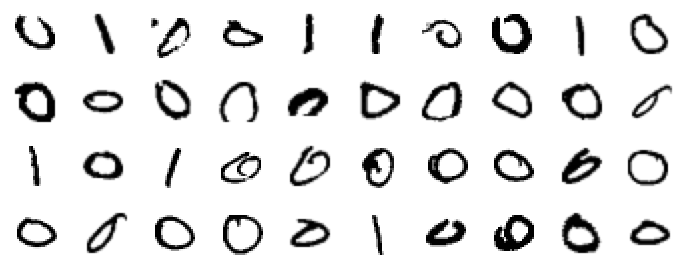

In [ ]:
# 20 imágenes más anómalas en test:

plt.figure(figsize=(12,12)) 
cont = 1 
for ind in inds_pca[:40]: 
  plt.subplot(10,10,cont) 
  plt.imshow(X_te2[ind], cmap="binary") 
  plt.axis("off") 
  cont = cont + 1